In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
# ------------------------------
# Step 1 — Generate 500 random points
# ------------------------------
random.seed(42)
def generate_continuous_points(n=1000, seed=0):
    np.random.seed(seed)
    NUS = np.random.uniform(15, 25, n)
    SW = np.random.uniform(50, 80, n)
    ST = np.random.uniform(50, 70, n)
    return np.column_stack([NUS, SW, ST])

# ------------------------------
# Step 2 — Snap to discrete grid
# ------------------------------
def snap_to_grid(points):
    x1_vals = np.arange(15, 26)
    x2_vals = np.round(np.arange(50, 81, 1), 3)
    x3_vals = np.round(np.arange(50, 71, 1), 3)

    snapped = np.zeros_like(points)

    for i, (x1, x2, x3) in enumerate(points):
        snapped[i, 0] = x1_vals[np.argmin(np.abs(x1_vals - x1))]
        snapped[i, 1] = x2_vals[np.argmin(np.abs(x2_vals - x2))]
        snapped[i, 2] = x3_vals[np.argmin(np.abs(x3_vals - x3))]

    return snapped

# ------------------------------
# Step 3 — Min–max farthest-point sampling
# ------------------------------

def farthest_point_sampling(points, n_select=90):
    # Start with a random point
    selected = [np.random.randint(len(points))]
    distances = cdist(points, points[selected])[:, 0]

    for _ in range(1, n_select):
        next_idx = np.argmax(distances)
        selected.append(next_idx)

        # Update distances: distance to the closest selected point
        new_distances = cdist(points, points[[next_idx]])[:, 0]
        distances = np.minimum(distances, new_distances)

    return points[selected]

# ------------------------------
# Main procedure
# ------------------------------

# Step 1
raw_points = generate_continuous_points(5000)

# Step 2
snapped_points = snap_to_grid(raw_points)

# Step 3
selected_points = farthest_point_sampling(snapped_points, 180)
# Save to CSV
df = pd.DataFrame(selected_points, columns=["NUS", "SW", "ST"])
df["NUS"] = df["NUS"].astype(int)
df["SW"] = df["SW"].astype(int)
df["ST"] = df["ST"].astype(int)
df.to_csv(r"selected_points.csv", index=False)


# Optionally print the points
selected_points

array([[24., 57., 66.],
       [18., 80., 50.],
       [23., 78., 70.],
       [16., 50., 50.],
       [25., 65., 51.],
       [15., 69., 61.],
       [15., 50., 63.],
       [25., 77., 59.],
       [15., 61., 53.],
       [25., 51., 56.],
       [22., 67., 69.],
       [16., 80., 63.],
       [15., 59., 70.],
       [15., 71., 50.],
       [23., 64., 60.],
       [15., 73., 70.],
       [22., 57., 50.],
       [24., 74., 51.],
       [16., 58., 61.],
       [19., 50., 70.],
       [18., 75., 57.],
       [22., 71., 62.],
       [24., 50., 63.],
       [19., 67., 55.],
       [16., 80., 70.],
       [17., 53., 56.],
       [24., 57., 59.],
       [18., 63., 65.],
       [23., 50., 50.],
       [25., 52., 70.],
       [22., 79., 64.],
       [16., 66., 70.],
       [17., 74., 64.],
       [25., 73., 67.],
       [18., 55., 66.],
       [24., 80., 52.],
       [22., 61., 70.],
       [22., 61., 55.],
       [24., 70., 56.],
       [16., 56., 50.],
       [16., 80., 56.],
       [17., 63.

In [5]:

def plot_3d(csv):
    df = pd.read_csv(csv)
    #var_names = df.columns.to_list()
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(selected_points[:,0], selected_points[:,1], selected_points[:,2],
            c='red', s=40, depthshade=True)

    ax.set_xlabel("NUS")
    ax.set_ylabel("SW")
    ax.set_zlabel("ST")
    ax.set_title("90 Sparse Points (Min–Max Selected After Snapping)")

    plt.show()

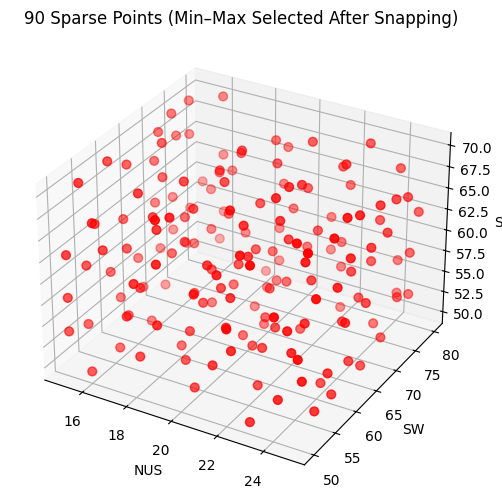

In [6]:
plot_3d("selected_points.csv")

In [8]:

import pandas as pd
import plotly.express as px

# === Load CSV ===
csv_path = r"selected_points.csv"
df = pd.read_csv(csv_path)

# === Choose columns ===
# Replace with your column names:
x_col = "NUS"
y_col = "SW"
z_col = "ST"
color_col = None  # Optional; set to None if not needed

# Filter numeric data and drop NaNs for these columns
cols = [x_col, y_col, z_col] + ([color_col] if color_col else [])
df_plot = df[cols].dropna()

# === Create interactive 3D scatter ===
fig = px.scatter_3d(
    df_plot,
    x=x_col, y=y_col, z=z_col,
    color=color_col if color_col else None,
    opacity=0.8,
    height=700,
)
fig.update_traces(marker=dict(size=4))  # adjust marker size
fig.update_layout(
    title="Interactive 3D Scatter",
    scene=dict(
        xaxis_title=x_col,
        yaxis_title=y_col,
        zaxis_title=z_col,
    ),
    legend_title_text=color_col if color_col else None,
)

# === Show (Jupyter/Notebook) ===
#fig.show()

# === Or save as a standalone HTML file ===
fig.write_html("interactive_3d_scatter_selected_points.html", include_plotlyjs="cdn")


In [40]:
def plot_pairwise_from_csv(csv_path):
    # Load CSV
    df = pd.read_csv(csv_path)
    var_names = df.columns.to_list()
    # Choose variables: if none provided, use numeric columns
    if var_names is None:
        var_names = df.select_dtypes(include="number").columns.tolist()
        if not var_names:
            raise ValueError("No numeric columns found. Please specify var_names explicitly.")

    # Keep only selected columns; drop rows with NaNs to avoid plotting artifacts
    df_sel = df[var_names].dropna()

    # Convert to NumPy array to match your original code’s design_space usage
    design_space = df_sel.to_numpy()  # shape: (n_samples, n_vars)
    n_vars = len(var_names)

    # Create a square grid of subplots; ensure 2D axes array
    fig, axes = plt.subplots(n_vars, n_vars, figsize=(8,8), squeeze=False)

    for i in range(n_vars):
        for j in range(n_vars):
            ax = axes[i, j]
            if i == j:
                # Diagonal: histogram of each variable
                ax.hist(design_space[:, i], bins=11, color='lightgray', edgecolor='black')
            else:
                # Off-diagonal: scatter of (x=j, y=i)
                ax.scatter(design_space[:, j], design_space[:, i], color='blue', s=20, alpha=0.7)

            # Labels on leftmost column and bottom row only (to avoid clutter)
            if j == 0:
                ax.set_ylabel(var_names[i])
            else:
                ax.set_ylabel("")

            if i == n_vars - 1:
                ax.set_xlabel(var_names[j])
            else:
                ax.set_xlabel("")
            
            # Optional: tidy ticks for readability
            ax.tick_params(labelsize=8)

    fig.suptitle('Pairwise Scatter Plots of Design Space', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
    fig.savefig('pairwise', dpi=200, bbox_inches='tight')
    #plt.close(fig)
    plt.show()


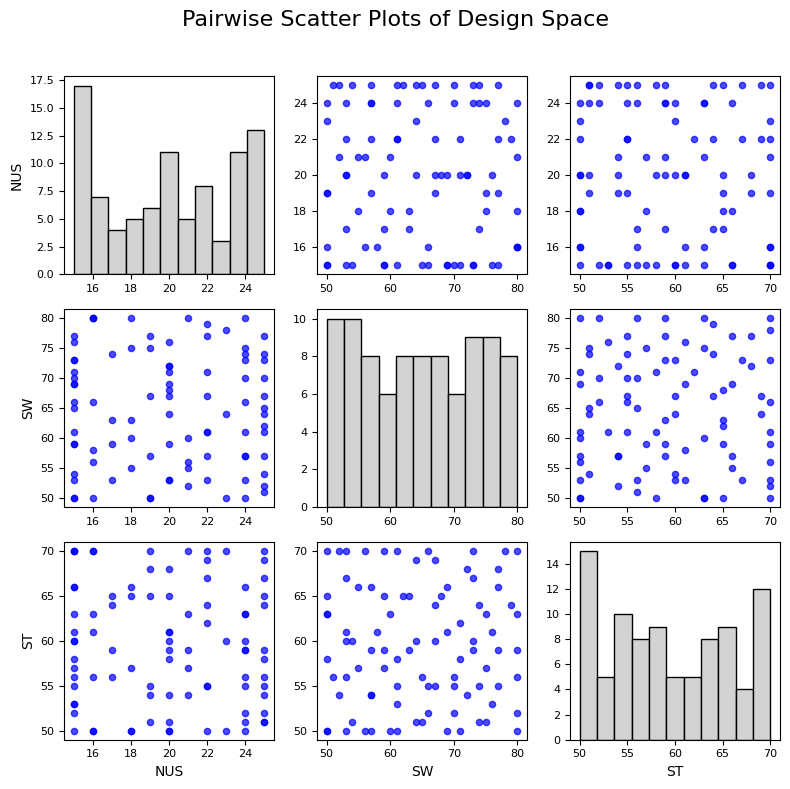

In [41]:
plot_pairwise_from_csv(r"C:\Users\z5713258\SVMG_MasterThesis\DesignSpace.csv")